In [25]:
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import os

In [26]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [27]:
path=os.chdir('/Users/elifriedmann/Downloads')

In [28]:
df3= pd.read_excel('Refinitiv Data.xlsx', index_col=0)

In [29]:
matrixcor=df3.corr(numeric_only=True)
matrixcor

,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap (USD),YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.332510,0.727313,0.717698,0.634124,0.753152,0.578559,0.682654,0.611744,0.588420,...,0.270779,0.219320,0.362488,0.159052,0.365369,-0.005452,0.317215,0.124097,-0.034201,0.027806
ESG Controversies Score,-0.332510,1.000000,-0.416083,-0.438721,-0.341144,-0.237922,-0.385343,-0.204238,-0.256453,-0.057741,...,-0.097565,-0.052891,-0.043801,-0.002797,-0.522942,-0.235047,-0.372310,-0.307973,-0.273684,-0.227188
Resource Use Score,0.727313,-0.416083,1.000000,0.806008,0.589488,0.599626,0.630826,0.460702,0.484943,0.173618,...,0.148225,0.108173,0.239551,0.062088,0.497798,0.004842,0.321253,0.154285,-0.023524,0.035500
Emissions Score,0.717698,-0.438721,0.806008,1.000000,0.555555,0.609875,0.565689,0.488556,0.489601,0.168346,...,0.221065,0.122120,0.210207,0.074360,0.431095,0.055144,0.311181,0.167314,0.021566,0.082453
Environmental Innovation Score,0.634124,-0.341144,0.589488,0.555555,1.000000,0.481251,0.445342,0.378018,0.442150,0.155914,...,0.116139,0.092898,0.163798,0.044149,0.415994,0.002837,0.195402,0.079634,-0.078869,-0.010125
Workforce Score,0.753152,-0.237922,0.599626,0.609875,0.481251,1.000000,0.465436,0.452536,0.441981,0.169173,...,0.191678,0.172398,0.377840,0.063822,0.304509,-0.074813,0.221963,0.105132,-0.041343,-0.000493
Human Rights Score,0.578559,-0.385343,0.630826,0.565689,0.445342,0.465436,1.000000,0.259543,0.286079,0.123305,...,0.073403,0.053803,0.153140,0.038969,0.455605,-0.029084,0.269139,0.194174,0.019982,0.015992
Community Score,0.682654,-0.204238,0.460702,0.488556,0.378018,0.452536,0.259543,1.000000,0.457965,0.208854,...,0.537086,0.440946,0.406369,0.167831,0.160671,0.040358,0.266085,0.105211,-0.018055,0.017885
Product Responsibility Score,0.611744,-0.256453,0.484943,0.489601,0.442150,0.441981,0.286079,0.457965,1.000000,0.144592,...,0.149923,0.150640,0.269032,0.140713,0.209099,0.068286,0.254093,0.069772,-0.061150,0.016228
Management Score,0.588420,-0.057741,0.173618,0.168346,0.155914,0.169173,0.123305,0.208854,0.144592,1.000000,...,0.037388,-0.001246,0.128599,0.142807,0.082173,-0.034316,0.089601,0.005572,-0.021516,0.028233


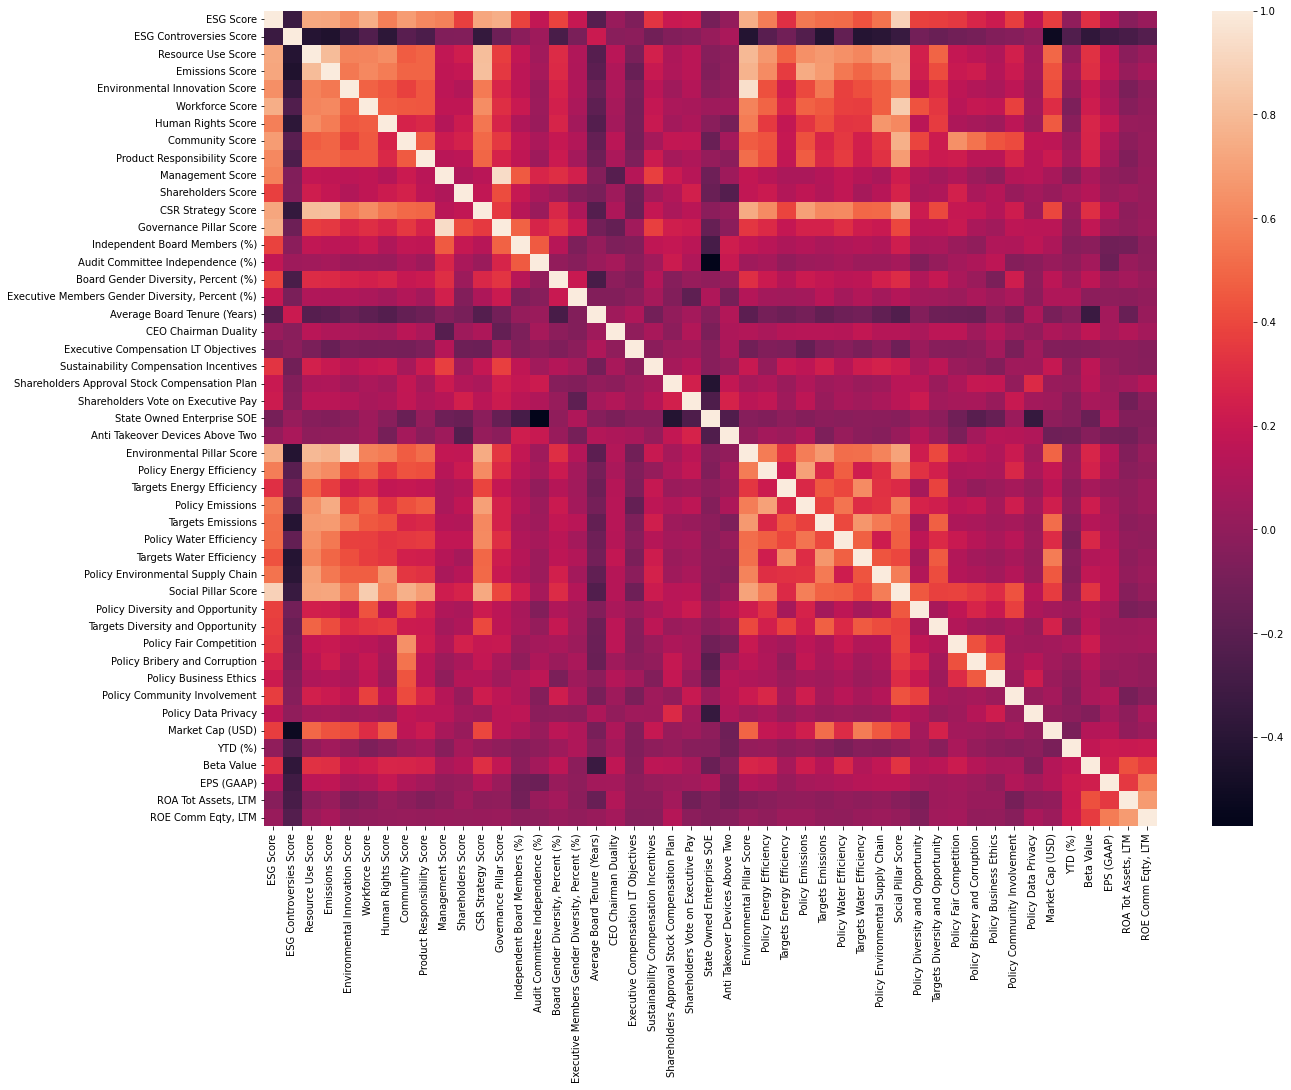

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(matrixcor);

In [31]:
df3['Size']=''
mkt='Market Cap (USD)'
M=1000000
for i in df3[mkt].index:
    if df3.loc[i, mkt] > 10000*M:
        df3.loc[i,'Size']='Large'
    elif df3.loc[i, mkt] > 2000*M and df3.loc[i, mkt] <= 10000*M:
        df3.loc[i,'Size']='Medium'
    else:
        df3.loc[i,'Size']='Small'

In [32]:
df3['Size'].value_counts()

Small     247
Medium     64
Large      17
Name: Size, dtype: int64

In [33]:
for d in df3:
    n0=0
    for c in df3.index:
        if df3[d][c]==0:
            n0=n0+1
    if n0/327 * 100 > 51:
        print(d,str((n0/327) * 100)+'% ',df3[d].dtype)
        df3.drop(d, axis=1, inplace=True)
df3.info()

Resource Use Score 59.9388379204893%  int64
Environmental Innovation Score 83.18042813455658%  int64
Human Rights Score 84.40366972477065%  int64
CSR Strategy Score 62.38532110091744%  int64
Executive Compensation LT Objectives 84.09785932721712%  bool
Sustainability Compensation Incentives 85.3211009174312%  bool
State Owned Enterprise SOE 99.69418960244649%  bool
Policy Energy Efficiency 63.30275229357798%  bool
Targets Energy Efficiency 97.55351681957187%  bool
Policy Emissions 74.31192660550458%  bool
Targets Emissions 94.80122324159022%  bool
Policy Water Efficiency 88.07339449541286%  bool
Targets Water Efficiency 97.24770642201835%  bool
Policy Environmental Supply Chain 93.27217125382263%  bool
Targets Diversity and Opportunity 96.94189602446484%  bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 335
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                   

In [34]:
x,y=[],[]
for i in df3['Size'].index:
    if df3.loc[i,'Size']!='Small':
        x.append(i)
    else:
        y.append(i)
small=df3.drop(x, axis=0)
mandl=df3.drop(y, axis=0)
small

,Name,ESG Score,ESG Controversies Score,Emissions Score,Workforce Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,Governance Pillar Score,...,Policy Community Involvement,Policy Data Privacy,RIC,Market Cap (USD),YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Size
5,Bread Financial Holdings Inc,77.48,31,75,81,94,86,92,76,86.48,...,True,True,BFH,1.535668e+09,19.676048,1.928712,4.460000,2.176750,18.739967,Small
10,Triumph Financial Inc,73.77,100,16,84,95,76,88,88,83.93,...,True,True,TFIN.O,1.404819e+09,23.818293,1.181276,3.960470,1.520630,10.565553,Small
17,Amalgamated Bank,67.00,100,69,67,61,76,48,85,61.28,...,True,True,AMAL.O,5.036552e+08,28.776041,0.764037,2.612030,1.144625,16.955896,Small
24,Camden National Corp,62.22,100,51,56,89,93,74,97,74.32,...,True,True,CAC.O,4.729528e+08,22.019669,0.735279,4.168220,1.030276,12.081662,Small
25,NBT Bancorp Inc,62.12,100,2,54,100,76,95,84,81.11,...,True,True,NBTB.O,1.511520e+09,17.065868,0.534308,3.519950,1.221691,12.140225,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Oconee Federal Financial Corp,17.27,100,0,22,9,30,30,29,25.68,...,False,True,OFED.O,9.005680e+07,36.360001,0.339855,0.732950,0.728633,5.345415,Small
330,Parke Bancorp Inc,17.15,100,0,12,30,30,28,26,23.65,...,True,True,PKBK.O,2.008235e+08,17.598843,0.754952,3.435030,2.133268,16.715870,Small
332,Exchange Bank,15.35,100,0,37,17,30,13,6,9.89,...,True,True,EXSR.PK,1.697201e+08,7.502433,0.291271,21.860001,1.113295,15.347726,Small
333,National Bankshares Inc,12.49,100,0,7,23,30,15,31,15.92,...,False,True,NKSH.O,1.754243e+08,23.591909,0.418732,4.329500,1.515323,17.498598,Small


In [35]:
mandl

,Name,ESG Score,ESG Controversies Score,Emissions Score,Workforce Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,Governance Pillar Score,...,Policy Community Involvement,Policy Data Privacy,RIC,Market Cap (USD),YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Size
0,Regions Financial Corp,82.43,100,74,81,95,76,96,57,87.08,...,True,True,RF,1.710542e+10,14.332096,1.207259,2.278130,1.451211,14.469506,Large
1,JPMorgan Chase & Co,82.06,2,85,78,82,76,99,27,80.78,...,True,True,JPM,4.120427e+11,5.152871,1.085487,12.084850,1.091467,15.221121,Large
2,Fifth Third Bancorp,79.13,100,83,83,97,76,84,67,80.96,...,True,True,FITB.O,1.764416e+10,19.506248,1.204542,3.349870,1.194908,13.926375,Large
3,Bank of America Corp,78.58,11,91,99,82,76,46,88,61.52,...,True,True,BAC,2.321414e+11,11.624396,1.383295,3.185190,0.889866,11.020621,Large
4,Capital One Financial Corp,78.20,24,84,82,99,76,86,74,81.04,...,True,True,COF,4.269739e+10,19.933304,1.471144,17.914551,1.306390,11.081059,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Cullen/Frost Bankers Inc,26.24,100,0,16,45,30,43,64,41.55,...,True,True,CFR,6.988536e+09,18.047869,1.050336,8.792010,1.282797,18.548553,Medium
318,TFS Financial Corp,21.90,100,0,27,40,30,29,33,25.62,...,True,True,TFSL.O,3.579803e+09,11.380985,0.491306,0.262140,0.523180,4.359731,Medium
321,Upstart Holdings Inc,21.07,8,9,11,48,30,25,58,28.39,...,False,True,UPST.O,2.787666e+09,142.738281,1.654731,1.312830,14.207871,35.992397,Medium
331,FTAI Aviation Ltd,16.76,100,18,8,48,30,20,21,17.54,...,False,True,FTAI.O,2.954964e+09,68.516357,1.870867,2.216570,2.715022,21.251564,Medium


In [36]:
corr4=small.corr(numeric_only=True)
corr4

,ESG Score,ESG Controversies Score,Emissions Score,Workforce Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,Governance Pillar Score,Independent Board Members (%),...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap (USD),YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.182790,0.549697,0.635935,0.638248,0.504884,0.636571,0.353148,0.753493,0.339270,...,0.281207,0.222821,0.363468,0.129313,0.218884,0.167070,0.251443,0.067087,0.014817,0.031620
ESG Controversies Score,-0.182790,1.000000,-0.366885,-0.069918,-0.131509,-0.230299,-0.025630,-0.028494,-0.065606,0.034453,...,-0.072574,-0.029898,-0.030998,0.031152,0.034853,-0.397491,-0.405132,-0.521915,-0.244236,-0.363952
Emissions Score,0.549697,-0.366885,1.000000,0.399242,0.383318,0.337168,0.107109,0.132731,0.229549,0.031577,...,0.202398,0.098582,0.170437,0.066888,0.137749,0.240027,0.229963,0.201712,0.024327,0.078216
Workforce Score,0.635935,-0.069918,0.399242,1.000000,0.357684,0.295434,0.126073,0.031716,0.177645,0.140461,...,0.148033,0.159729,0.391096,0.000749,0.193251,0.028999,0.147478,0.038639,-0.034226,-0.025759
Community Score,0.638248,-0.131509,0.383318,0.357684,1.000000,0.346539,0.140134,0.226511,0.239491,0.109178,...,0.547045,0.458202,0.394052,0.169107,0.204451,0.108723,0.184418,0.066037,-0.011730,0.022658
Product Responsibility Score,0.504884,-0.230299,0.337168,0.295434,0.346539,1.000000,0.070632,0.130739,0.146485,0.086952,...,0.092100,0.107749,0.242484,0.105621,0.125214,0.201664,0.171088,0.074367,-0.045583,0.007980
Management Score,0.636571,-0.025630,0.107109,0.126073,0.140134,0.070632,1.000000,0.079787,0.942558,0.423083,...,0.056078,-0.024993,0.105536,0.106499,0.050570,0.051807,0.077096,-0.050023,0.061519,0.040135
Shareholders Score,0.353148,-0.028494,0.132731,0.031716,0.226511,0.130739,0.079787,1.000000,0.384960,0.137698,...,0.073085,0.123536,-0.029176,0.011534,0.037835,0.157226,0.129234,0.017418,0.056472,0.044214
Governance Pillar Score,0.753493,-0.065606,0.229549,0.177645,0.239491,0.146485,0.942558,0.384960,1.000000,0.429672,...,0.089317,0.025789,0.110217,0.103064,0.076775,0.117020,0.136475,-0.022279,0.078201,0.054141
Independent Board Members (%),0.339270,0.034453,0.031577,0.140461,0.109178,0.086952,0.423083,0.137698,0.429672,1.000000,...,0.005597,0.069054,0.104361,0.032842,0.078381,0.010508,0.014319,-0.213445,-0.046282,-0.035075


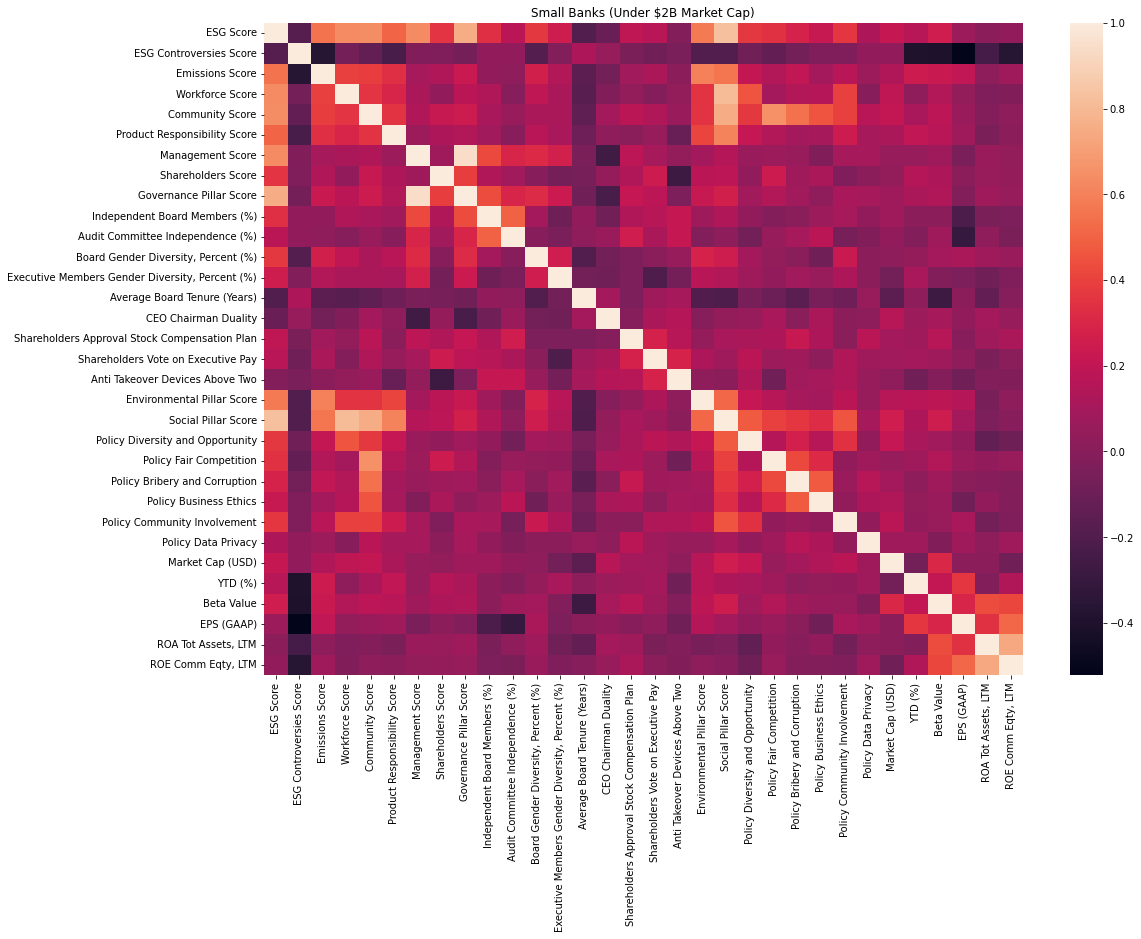

In [37]:
plt.subplots(figsize=(17,12))
plt.title('Small Banks (Under $2B Market Cap)')
sns.heatmap(corr4);

In [38]:
corr5=mandl.corr(numeric_only=True)
corr5

,ESG Score,ESG Controversies Score,Emissions Score,Workforce Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,Governance Pillar Score,Independent Board Members (%),...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap (USD),YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.341813,0.743636,0.826650,0.667005,0.635708,0.611117,0.376060,0.780362,0.579233,...,0.192980,0.233138,0.278559,0.282580,0.422490,-0.296577,0.050233,0.021524,-0.274914,-0.061951
ESG Controversies Score,-0.341813,1.000000,-0.391317,-0.284456,-0.167695,-0.173743,-0.063630,-0.027975,-0.126310,-0.084416,...,-0.104962,-0.073274,0.117603,-0.051488,-0.630385,-0.080080,-0.258758,-0.134188,-0.259792,-0.063501
Emissions Score,0.743636,-0.391317,1.000000,0.710805,0.480421,0.505739,0.224332,0.186862,0.407593,0.371852,...,0.240330,0.155697,0.122438,0.126377,0.458288,-0.150762,0.083118,0.010332,-0.138907,0.032470
Workforce Score,0.826650,-0.284456,0.710805,1.000000,0.442286,0.506942,0.204882,0.376967,0.430091,0.357591,...,0.236425,0.186984,0.227698,0.221498,0.371551,-0.287922,0.000323,0.040097,-0.198309,-0.028772
Community Score,0.667005,-0.167695,0.480421,0.442286,1.000000,0.519677,0.363041,0.212104,0.489085,0.380350,...,0.474165,0.402513,0.236381,0.214085,0.146590,-0.141741,0.045201,0.011841,-0.219917,-0.091138
Product Responsibility Score,0.635708,-0.173743,0.505739,0.506942,0.519677,1.000000,0.254170,0.098406,0.350154,0.362483,...,0.236032,0.263152,0.203095,0.254038,0.221762,-0.190510,0.116305,-0.059148,-0.226137,-0.035782
Management Score,0.611117,-0.063630,0.224332,0.204882,0.363041,0.254170,1.000000,0.138238,0.929213,0.550591,...,-0.116668,0.075000,0.199331,0.255270,0.121106,-0.257637,0.006973,0.031435,-0.229515,-0.023764
Shareholders Score,0.376060,-0.027975,0.186862,0.376967,0.212104,0.098406,0.138238,1.000000,0.430806,0.348339,...,0.068202,0.124300,0.206421,0.226250,-0.029163,-0.139453,-0.065802,-0.036904,-0.019834,-0.087558
Governance Pillar Score,0.780362,-0.126310,0.407593,0.430091,0.489085,0.350154,0.929213,0.430806,1.000000,0.632199,...,-0.025028,0.133086,0.247989,0.299371,0.182947,-0.287486,0.005929,0.005232,-0.247501,-0.056087
Independent Board Members (%),0.579233,-0.084416,0.371852,0.357591,0.380350,0.362483,0.550591,0.348339,0.632199,1.000000,...,-0.079853,0.312518,0.133159,0.508510,0.184585,-0.166630,-0.198374,-0.060126,-0.231432,0.013366


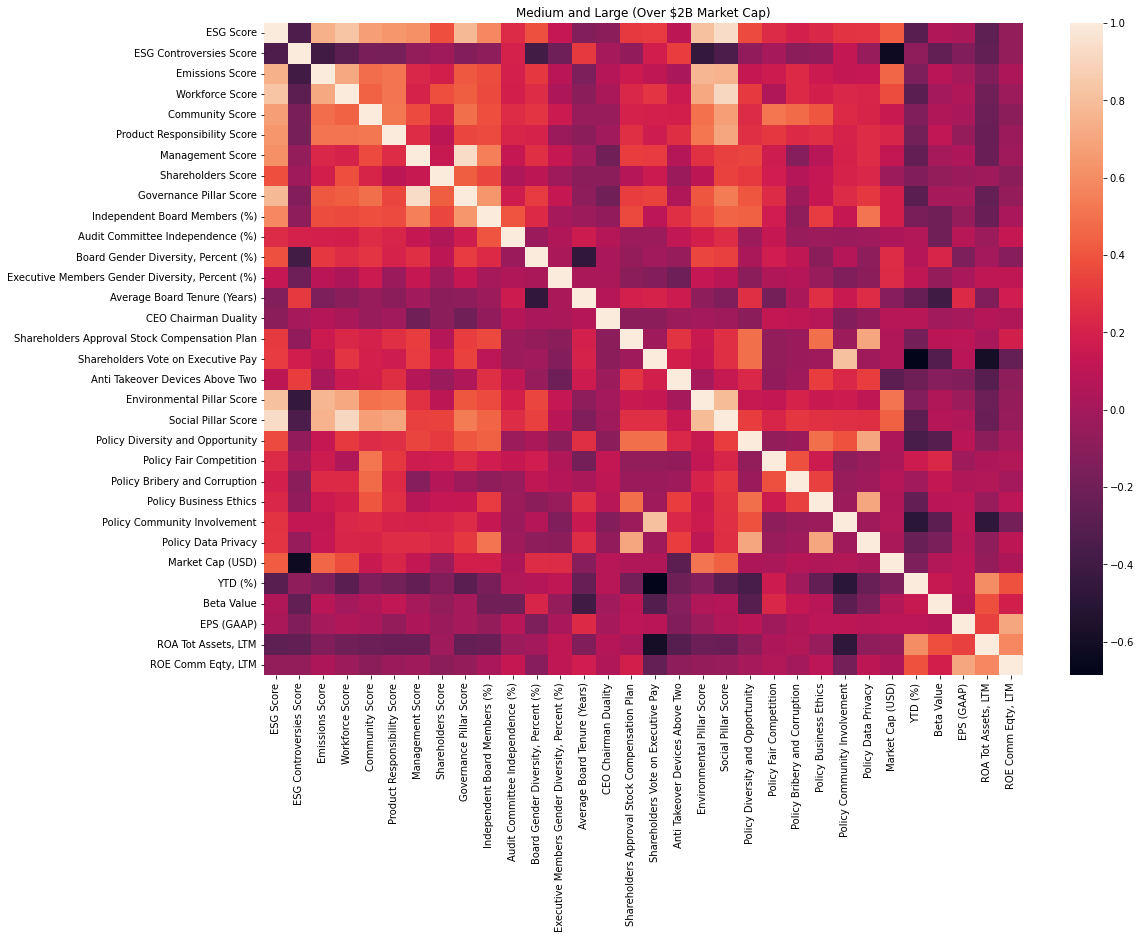

In [39]:
plt.subplots(figsize=(17,12))
plt.title('Medium and Large (Over $2B Market Cap)')
sns.heatmap(corr5);

In [47]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
obj=['Name', 'Size', 'RIC']
# Generate some sample data
X = small.drop(obj, axis=1)  # Example data with 100 samples and 5 features
X2= X.values
# Apply feature selection
X_selected = X.values

# Create an instance of the K-means clustering model
kmeans = KMeans(n_clusters=3)

# Fit the model to the selected features
kmeans.fit_transform(X_selected)

# Access the cluster labels
labels = kmeans.labels_
nclusters= Counter(labels)
nclusters
lab=pd.Series(labels)
lab
small

0      2
1      2
2      1
3      1
4      2
      ..
242    1
243    1
244    1
245    1
246    1
Length: 247, dtype: int32

In [46]:
obj=['Name', 'Size', 'RIC']
# Generate some sample data
X1 = mandl.drop(obj, axis=1)  # Example data with 100 samples and 5 features
# Apply feature selection
X1_selected = X1.values

# Create an instance of the K-means clustering model
kmeans = KMeans(n_clusters=3)

# Fit the model to the selected features
kmeans.fit(X1_selected)

# Access the cluster labels
labels1 = kmeans.labels_
nclusters1= Counter(labels1)
nclusters1

Counter({0: 77, 2: 1, 1: 3})